## K Means Clstering 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000,centers= 3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

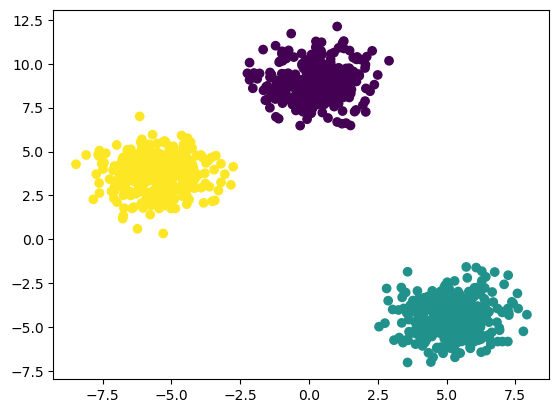

In [4]:
plt.scatter(X[:,0], X[:,1], c = y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [6]:
from sklearn.cluster import KMeans

### Manual Process - Elbow Method

In [8]:
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [9]:
wcss

[34827.576825520206,
 7935.4372861454185,
 1319.2730531585612,
 1140.4677884655123,
 992.012250357085,
 856.5454213145927,
 765.2186512146661,
 662.9925418030548,
 577.9067942426866,
 534.1500023859661]

### Plot Elbow Curve

Text(0, 0.5, 'wcss')

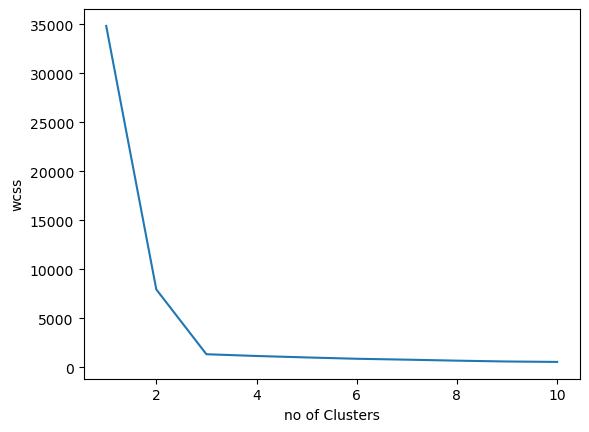

In [12]:
plt.plot(range(1,11),wcss)
plt.xlabel("no of Clusters")
plt.ylabel('wcss')

Conclusion : k = 3

In [13]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')

In [14]:
y_labels = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


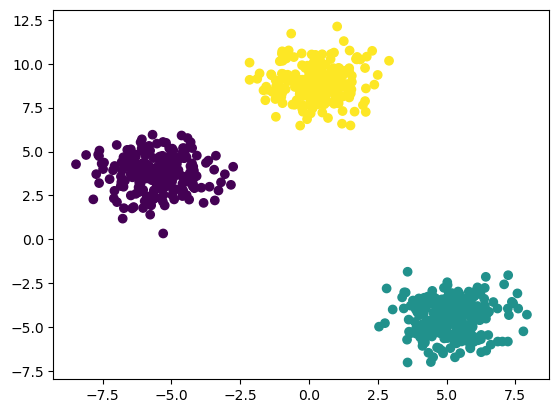

In [15]:
plt.scatter(X_train[:, 0], X_train[:,1], c = y_labels)

In [16]:
y_pred_label = kmeans.predict(X_test)

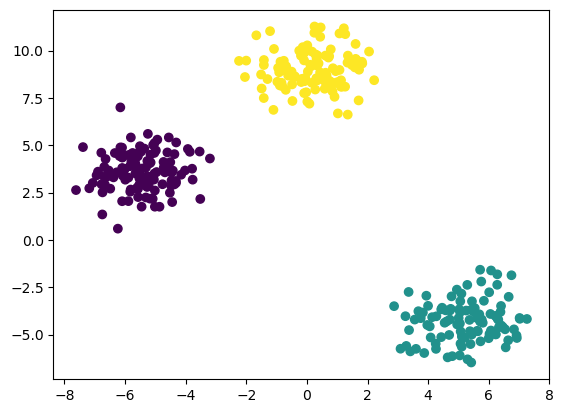

In [18]:
plt.scatter(X_test[:, 0], X_test[:,1], c = y_pred_label)

## Automatic process

In [19]:
!pip install kneed

In [20]:
from kneed import KneeLocator

In [22]:
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction='decreasing')

In [24]:
kl.elbow

3

## Performance Matrix

In [25]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficient = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficient.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [30]:
silhouette_coefficient

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.3375447395994776,
 0.34575016442546685,
 0.3375675439035092,
 0.34236102801222656,
 0.3410072818907241]

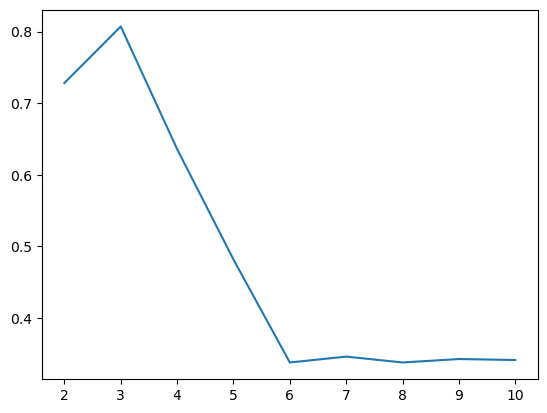

In [34]:
plt.plot(range(2,11), silhouette_coefficient)

conclusion : 
    for k = 3, sillhoitte score >80% its better